In [1]:
!pip install scikit-posthocs
!pip install vectorbt

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 527.6/527.6 kB 14.0 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 295.7/295.7 kB 18.4 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 119.4/119.4 kB 8.6 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1.6/1.6 MB 45.1 MB/s eta 0:00:00


In [2]:
import zipfile

# Define the path to the zip file
zip_path = "/content/Data for modelling.zip"
extract_path = "/content/Data_for_modelling"  # Folder to extract files

# Unzip the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [68]:
import pandas as pd
import numpy as np
ticker = 'NIKKEI'
df = pd.read_csv(f'/content/Data_for_modelling/Data for modelling/Developed/NIKKEI/{ticker}.csv', index_col=0)
data = pd.read_csv(f'/content/Data_for_modelling/Data for modelling/Developed/NIKKEI/{ticker}_return.csv')

data.index = df['Date']
data = data.dropna()

In [69]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# Ensure index is datetime
data.index = pd.to_datetime(data.index)

# Compute cumulative returns
cumulative_returns = (1 + data).cumprod()

# Plot
plt.figure(figsize=(12, 6))

for column in cumulative_returns.columns:
    plt.plot(cumulative_returns.index, cumulative_returns[column], label=column)

plt.plot(cumulative_returns.index, cumulative_returns['BnH'], label='BnH', linewidth=3)

plt.title('Cumulative Returns of Trading Strategies')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid()

# Format x-axis to show only years
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.gca().xaxis.set_major_locator(mdates.YearLocator(3))  # Show every 3 years
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format as YYYY
plt.xticks(rotation=45)  # Rotate labels if needed

plt.legend()
plt.title('Cumulative Returns of Trading Strategies')
plt.xlabel('Year')
plt.ylabel('Cumulative Return')
plt.grid()
plt.savefig(f'/content/Data_for_modelling/Data for modelling/Developed/NIKKEI/{ticker}_1.png')

In [70]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # Import for Colab

# Load the two images
first_image = cv2.imread(f'/content/Data_for_modelling/Data for modelling/Developed/NIKKEI/{ticker}.png')   # Update path
second_image = cv2.imread(f'/content/Data_for_modelling/Data for modelling/Developed/NIKKEI/{ticker}_1.png') # Update path

# Convert images to grayscale to detect the date axis
gray_second = cv2.cvtColor(second_image, cv2.COLOR_BGR2GRAY)

# Crop the date axis from the second image (adjust if needed)
y_start = int(second_image.shape[0] * 0.9)  # Lower 10% contains the date axis
date_axis = second_image[y_start:, :]

# Remove the incorrect date axis from the first image (set that region to white)
first_image[y_start:, :] = 255  # White background

# Overlay the new date axis onto the first image
first_image[y_start:, :] = date_axis

# Save and display the fixed image
cv2.imwrite(f'/content/Data_for_modelling/Data for modelling/Frontier/VNI/{ticker}_final.png', first_image)
cv2_imshow(first_image)  # Use this instead of cv2.imshow()


# **Compare return**

In [71]:
import pandas as pd
import scipy.stats as stats
import scikit_posthocs as sp

# Reshape data: Convert from wide format to long format
data_long = data.reset_index().melt(id_vars="Date", var_name="model", value_name="daily_return")

# Get unique models (including 'BnH')
models = data.columns.tolist()

# Convert data to the format required for Kruskal-Wallis test
returns_data = [data[model].dropna().values for model in models]  # Drop NaNs

# Perform Kruskal-Wallis test
print("\nüìä Performing Kruskal-Wallis test on daily returns...\n")
test_stat, p_value = stats.kruskal(*returns_data)

# Display Kruskal-Wallis test result
if p_value < 0.05:
    print(f"‚ö†Ô∏è Kruskal-Wallis Test Result: p={p_value:.4f} ‚Üí Significant Difference Found!")

    # Perform Nemenyi post-hoc test
    nemenyi_test = sp.posthoc_nemenyi(data_long, val_col="daily_return", group_col="model")

    # Format Nemenyi results to 4 decimal places
    nemenyi_test = nemenyi_test.map(lambda x: f"{x:.4f}")

    # Display Nemenyi test results
    print("\nüìä Nemenyi Test Results for Daily Returns:\n")
    print(nemenyi_test.to_string(index=True))
else:
    print(f"‚úÖ No significant difference found (p={p_value:.4f})")




üìä Performing Kruskal-Wallis test on daily returns...

‚úÖ No significant difference found (p=0.1919)


In [72]:
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis

# Calculate daily return statistics for each model
summary_stats = pd.DataFrame(index=data.columns)

summary_stats['Mean_Return'] = data.mean()  # Mean daily return
summary_stats['Std_Dev'] = data.std()  # Standard deviation (volatility)
summary_stats['Skewness'] = data.apply(skew)  # Skewness (asymmetry)
summary_stats['Kurtosis'] = data.apply(kurtosis)  # Kurtosis (tail risk)

# Display results rounded to 4 decimal places
print(summary_stats.round(4))

                 Mean_Return  Std_Dev  Skewness  Kurtosis
BnH                   0.0004   0.0143   -0.3014    8.1353
LR                    0.0007   0.0076    0.0139    6.7083
SVM                   0.0006   0.0077   -0.0291    7.0777
DT                    0.0006   0.0073    0.0508    7.0497
RF                    0.0007   0.0077    0.0094    6.5212
XGB                   0.0007   0.0077   -0.0249    6.7922
LGB                   0.0006   0.0076   -0.0199    6.7156
MLP                   0.0007   0.0075   -0.0229    6.8292
CNN                   0.0004   0.0078   -0.1633    6.5871
LSTM                  0.0005   0.0080   -0.0490    6.6050
GRU                   0.0003   0.0079   -0.2544    6.4228
Transformer           0.0004   0.0080   -0.1808    6.4078
CNN_LSTM              0.0003   0.0080   -0.1681    5.9441
CNN_Transformer       0.0004   0.0079   -0.1895    6.4209
GAN                   0.0001   0.0072   -0.4562    6.3027


In [73]:
metrics = ['Total Return [%]', 'Sharpe Ratio', 'Sortino Ratio', 'Max Drawdown [%]']
performance = pd.read_csv(f'/content/Data_for_modelling/Data for modelling/Developed/NIKKEI/{ticker}_trading.csv', index_col=0)
print(performance.loc[metrics])

                                   LR                  SVM  \
Total Return [%]   32.225257311582304    40.47051031589725   
Sharpe Ratio      0.07862645029713167  0.11737243290047421   
Sortino Ratio     0.10971906675158569  0.16270739459037395   
Max Drawdown [%]    52.05237522207655   52.679100644789614   

                                   DT                   RF  \
Total Return [%]   39.859016251509274    54.66475644014293   
Sharpe Ratio      0.11052645725464989  0.17153414093319372   
Sortino Ratio     0.15387888944105832  0.23809452478737048   
Max Drawdown [%]    46.25106477063561    41.29216447128325   

                                  XGB                  LGB  \
Total Return [%]     48.9385692027622    43.92048103920611   
Sharpe Ratio       0.1506230548567788  0.13179510484735468   
Sortino Ratio     0.20928514751199254  0.18293243084101635   
Max Drawdown [%]    45.89941091027614    44.90584710006062   

                                  MLP                  CNN  \
Total

In [74]:
import vectorbt as vbt
bnh = pd.read_csv(f'/content/Data_for_modelling/Data for modelling/Developed/NIKKEI/{ticker}.csv', index_col=0)
bnh.index = bnh['Date']
bnh['signal'] = [1]*len(bnh)

In [75]:
data['close'] = bnh['close']
data['signal'] = bnh['signal']

In [76]:
p1 = vbt.Portfolio.from_signals(
        close=bnh['close'],
        entries=bnh.signal==1,  # Entries where signal is 1
        exits=bnh.signal == 0,  # Exits where signal is 0
        size=1,  # Assuming equal position size
        fixed_fees=0.001,  # Example transaction cost
        slippage=0.001,
        freq='1d'
    )
p1.stats(agg_func=None).T.loc[metrics]

Total Return [%]    320.756284
Sharpe Ratio          0.489181
Sortino Ratio         0.683201
Max Drawdown [%]     61.367936
dtype: object

# **Accuracy**

In [77]:
import pandas as pd
import scipy.stats as stats
import scikit_posthocs as sp
import numpy as np
import os

# Define parameters
models = ['LR', 'SVM', 'DT', 'RF', 'XGB', 'LGB', 'MLP',
          'CNN', 'LSTM', 'GRU', 'Transformer',
          'CNN_LSTM', 'CNN_Transformer', 'GAN']

base_path = "/content/Data_for_modelling/Data for modelling/Developed/NIKKEI/"


# Load all model data into a single DataFrame
data_list = []
for model in models:
    file_path = os.path.join(base_path, f"{ticker}_{model}.csv")
    if os.path.exists(file_path):
        df = pd.read_csv(file_path)
        df['model'] = model  # Add model name column
        data_list.append(df)
        print(f"‚úÖ Loaded {model} data successfully.")
    else:
        print(f"‚ö†Ô∏è {model} file not found at {file_path}. Skipping.")

# Merge all data
data = pd.concat(data_list, ignore_index=True)

# Get metric columns (excluding 'ticker' and 'model')
metrics = ['Accuracy', 'Precision', 'Recall', 'F1_Score', 'MCC', 'AUC']

# Store results
kruskal_results = {}
nemenyi_results = {}

# Loop through each metric
for metric in metrics:
    print(f"\nüìä Performing Kruskal-Wallis test for {metric}...\n")

    # Extract values for all models
    metric_values = [data[data['model'] == model][metric] for model in models if model in data['model'].unique()]

    # Perform Kruskal-Wallis test
    test_stat, p_value = stats.kruskal(*metric_values)

    # Store Kruskal-Wallis results
    kruskal_results[metric] = {'p_value': p_value}

    # Print Kruskal-Wallis results
    if p_value < 0.05:
        print(f"‚ö†Ô∏è Kruskal-Wallis Result: p={p_value:.4f} ‚Üí Significant Difference!")

        # Perform Nemenyi post-hoc test (Corrected version)
        nemenyi_test = sp.posthoc_nemenyi(data, val_col=metric, group_col='model')

        # Store Nemenyi results
        nemenyi_results[metric] = nemenyi_test

        print(f"\nüìä Nemenyi Test Results for {metric}:\n")
        print(nemenyi_test.round(4))
    else:
        print(f"‚úÖ No significant difference found (p={p_value:.4f})")

# Print summary of Kruskal-Wallis tests
print("\nüîπ Summary of Kruskal-Wallis Test Results:")
kruskal_summary_df = pd.DataFrame(kruskal_results).T
print(kruskal_summary_df.round(4))

# Print summary of Nemenyi test results (if any)
if nemenyi_results:
    print("\nüîπ Summary of Nemenyi Test Results:")
    for metric, result in nemenyi_results.items():
        print(f"\nüìä Nemenyi test for {metric}:\n")
        print(result.round(4))

‚úÖ Loaded LR data successfully.
‚úÖ Loaded SVM data successfully.
‚úÖ Loaded DT data successfully.
‚úÖ Loaded RF data successfully.
‚úÖ Loaded XGB data successfully.
‚úÖ Loaded LGB data successfully.
‚úÖ Loaded MLP data successfully.
‚úÖ Loaded CNN data successfully.
‚úÖ Loaded LSTM data successfully.
‚úÖ Loaded GRU data successfully.
‚úÖ Loaded Transformer data successfully.
‚úÖ Loaded CNN_LSTM data successfully.
‚úÖ Loaded CNN_Transformer data successfully.
‚úÖ Loaded GAN data successfully.

üìä Performing Kruskal-Wallis test for Accuracy...

‚ö†Ô∏è Kruskal-Wallis Result: p=0.0000 ‚Üí Significant Difference!

üìä Nemenyi Test Results for Accuracy:

                    CNN  CNN_LSTM  CNN_Transformer      DT     GAN     GRU  \
CNN              1.0000    0.9962           0.9176  0.0000  0.0000  0.6847   
CNN_LSTM         0.9962    1.0000           1.0000  0.0329  0.0000  0.9999   
CNN_Transformer  0.9176    1.0000           1.0000  0.1956  0.0006  1.0000   
DT               0.0000   

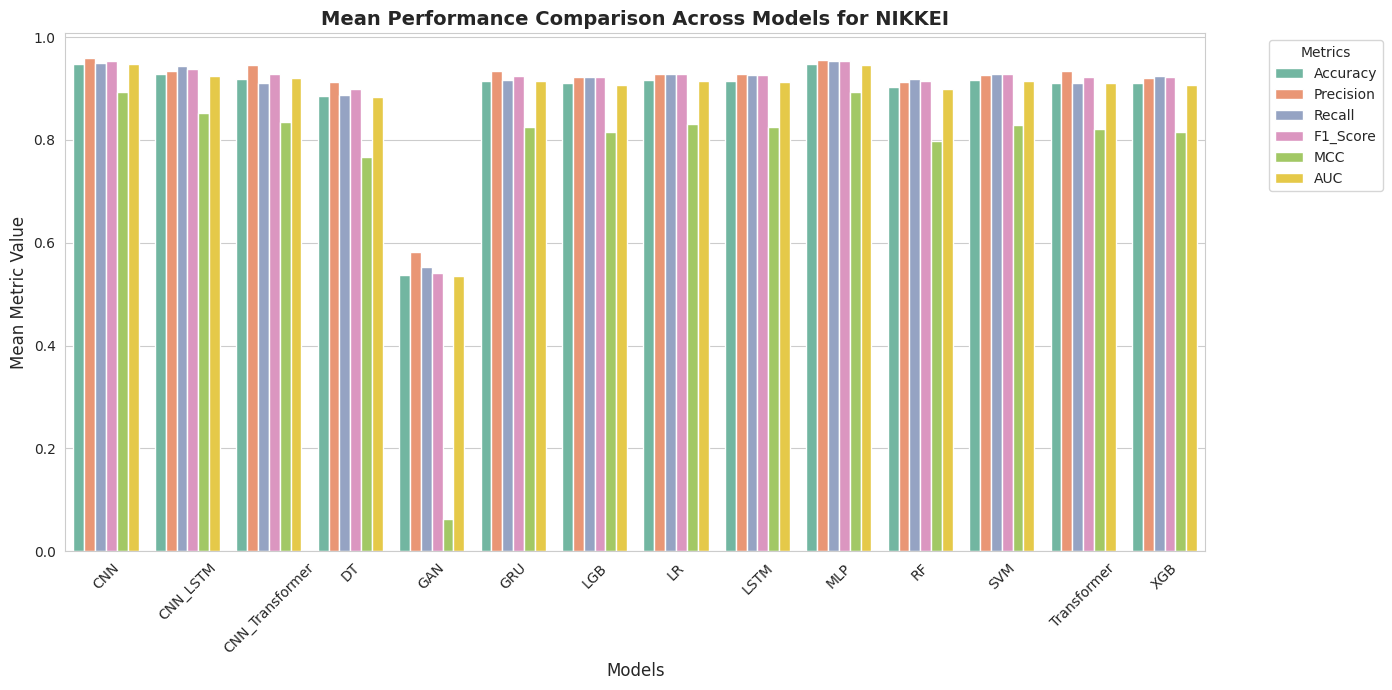

In [78]:
import pandas as pd
import scipy.stats as stats
import scikit_posthocs as sp
import os
import matplotlib.pyplot as plt
import seaborn as sns
mean_performance = data.groupby('model')[metrics].mean().reset_index()

plt.figure(figsize=(14, 7))

# Reshape the data for Seaborn
data_melted = mean_performance.melt(id_vars=['model'], value_vars=metrics, var_name='Metric', value_name='Mean Value')

# Create a grouped bar plot
sns.set_style("whitegrid")
ax = sns.barplot(x='model', y='Mean Value', hue='Metric', data=data_melted, palette="Set2")

# Rotate x-axis labels for readability
plt.xticks(rotation=45)
plt.title(f"Mean Performance Comparison Across Models for {ticker}", fontsize=14, fontweight='bold')
plt.xlabel("Models", fontsize=12)
plt.ylabel("Mean Metric Value", fontsize=12)
plt.legend(title="Metrics", bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.tight_layout()
plt.show()

In [79]:
mean_performance.round(4)

model  Accuracy  Precision  Recall  F1_Score     MCC     AUC
0               CNN    0.9477     0.9595  0.9496    0.9542  0.8937  0.9476
1          CNN_LSTM    0.9277     0.9333  0.9434    0.9377  0.8523  0.9245
2   CNN_Transformer    0.9186     0.9458  0.9118    0.9280  0.8356  0.9199
3                DT    0.8847     0.9124  0.8866    0.8983  0.7664  0.8834
4               GAN    0.5371     0.5821  0.5530    0.5417  0.0628  0.5353
5               GRU    0.9143     0.9346  0.9167    0.9252  0.8255  0.9142
6               LGB    0.9105     0.9218  0.9233    0.9225  0.8161  0.9076
7                LR    0.9173     0.9287  0.9283    0.9284  0.8301  0.9148
8              LSTM    0.9151     0.9283  0.9260    0.9268  0.8260  0.9127
9               MLP    0.9476     0.9555  0.9539    0.9543  0.8936  0.9466
10               RF    0.9022     0.9127  0.9185    0.9155  0.7989  0.8985
11              SVM    0.9163     0.9271  0.9283    0.9275  0.8283  0.9141
12      Transformer    0.9117     0.9347  0.9108    0.9218  0.8215  0.9113
13              XGB    0.9101     0.9210  0.9235    0.9222  0.8153  0.9070